In [12]:
import numpy as np

def binomial_call(S, K, T, r, sigma, n):
    dt = T/n
    u = np.exp(sigma * np.sqrt(dt))
    print(u)
    d = 1/u
    print(d)
    p = (np.exp(r * dt) - d)/(u - d)
    print(u*(1-p) + d*p)
    f = np.zeros((n+1, n+1))
    for j in range(n+1):
        f[n, j] = max(0, S*(u**j)*(d**(n-j)) - K)
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            f[i, j] = np.exp(-r*dt) * (p*f[i+1,j+1] + (1-p)*f[i+1,j])
    call_price = f[0, 0]
    return call_price

S = 100   # stock price
K = 110   # strike price
T = 1     # time to expiration (in years)
r = 0.05  # risk-free rate
sigma = 0.2   # volatility
n = 100   # number of time steps

call_price = binomial_call(S, K, T, r, sigma, n)
print(f"Fair price of the call option: {call_price:.2f}")

1.0202013400267558
0.9801986733067554
0.9998998883126753
Fair price of the call option: 6.05


In [6]:
import numpy as np

def binomial_call(S, K, T, r, sigma, n):
    dt = T/n   # 计算每个时间步长的长度
    u = np.exp(sigma*np.sqrt(dt))   # 上涨因子
    d = np.exp(-sigma*np.sqrt(dt))  # 下跌因子
    p = (np.exp(r*dt) - d) / (u - d)   # 上涨概率
    paths = np.zeros((n+1, n+1))   # 创建存储股价路径的数组
    for i in range(n+1):
        for j in range(i+1):
            paths[j, i] = S * (u**j) * (d**(i-j))   # 计算每个时间步长的股价
    payoffs = np.maximum(paths[:, -1] - K, 0)   # 计算期权到期时的收益
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            payoffs[j] = np.exp(-r*dt) * (p*payoffs[j] + (1-p)*payoffs[j+1])   # 计算每个时间步长的期望收益
    call_price = payoffs[0]   # 期权公允价格等于到期时的期望收益
    return call_price

S = 100   # 股票当前价格
K = 110   # 行权价格
T = 1     # 到期时间（以年为单位）
r = 0.05  # 无风险利率
sigma = 0.2   # 波动率
n = 100   # 时间步数

call_price = binomial_call(S, K, T, r, sigma, n)   # 计算期权公允价格
print(f"期权公允价格为: {call_price:.2f}")



期权公允价格为: 3.77


In [2]:
import numpy as np

def monte_carlo_call(S, K, T, r, sigma, n, m):
    dt = T/n
    paths = np.zeros((m, n+1))
    paths[:, 0] = S
    for i in range(m):
        for j in range(1, n+1):
            z = np.random.normal()
            paths[i, j] = paths[i, j-1] * np.exp((r - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*z)
    payoffs = np.maximum(paths[:, -1] - K, 0)
    expected_payoff = np.mean(payoffs)
    discounted_payoff = np.exp(-r*T) * expected_payoff
    return discounted_payoff

S = 100   # stock price
K = 110   # strike price
T = 1     # time to expiration (in years)
r = 0.05  # risk-free rate
sigma = 0.2   # volatility
n = 100   # number of time steps
m = 10000 # number of simulations

call_price = monte_carlo_call(S, K, T, r, sigma, n, m)
print(f"Fair price of the call option: {call_price:.2f}")

Fair price of the call option: 6.03


In [4]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    call_price = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    return call_price

S = 100   # 股票当前价格
K = 110   # 行权价格
T = 1     # 到期时间（以年为单位）
r = 0.05  # 无风险利率
sigma = 0.2   # 波动率

call_price = black_scholes_call(S, K, T, r, sigma)   # 计算期权公允价格
print(f"期权公允价格为: {call_price:.2f}")

期权公允价格为: 6.04


[230.69599609 233.57969604 236.463396   239.34709595 242.2307959
 245.11449585 247.9981958  250.88189575 253.7655957  256.64929565
 259.53299561 262.41669556 265.30039551 268.18409546 271.06779541
 273.95149536 276.83519531 279.71889526 282.60259521 285.48629517
 288.36999512 291.25369507 294.13739502 297.02109497 299.90479492
 302.78849487 305.67219482 308.55589478 311.43959473 314.32329468
 317.20699463 320.09069458 322.97439453 325.85809448 328.74179443
 331.62549438 334.50919434 337.39289429 340.27659424 343.16029419
 346.04399414]
0.19944836542824074


C:\Users\Miles\AppData\Local\Temp\ipykernel_25696\1841556120.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  sigma = sigma - (opt_price_bs - opt_price[idx]) / vega
C:\Users\Miles\AppData\Local\Temp\ipykernel_25696\1841556120.py:60: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S/opt_strike[idx]) + (rf + 0.5*sigma**2)*delta_t[-1]) / (sigma*np.sqrt(delta_t[-1]))


39.38456410616898


C:\Users\Miles\AppData\Local\Temp\ipykernel_25696\1841556120.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  sigma = sigma - (opt_price_bs - opt_price[idx]) / vega
C:\Users\Miles\AppData\Local\Temp\ipykernel_25696\1841556120.py:60: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S/opt_strike[idx]) + (rf + 0.5*sigma**2)*delta_t[-1]) / (sigma*np.sqrt(delta_t[-1]))
C:\Users\Miles\AppData\Local\Temp\ipykernel_25696\1841556120.py:60: RuntimeWarning: overflow encountered in scalar power
  d1 = (np.log(S/opt_strike[idx]) + (rf + 0.5*sigma**2)*delta_t[-1]) / (sigma*np.sqrt(delta_t[-1]))


12.264795587650463


C:\Users\Miles\AppData\Local\Temp\ipykernel_25696\1841556120.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  sigma = sigma - (opt_price_bs - opt_price[idx]) / vega
C:\Users\Miles\AppData\Local\Temp\ipykernel_25696\1841556120.py:60: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S/opt_strike[idx]) + (rf + 0.5*sigma**2)*delta_t[-1]) / (sigma*np.sqrt(delta_t[-1]))


18.32517753209491


C:\Users\Miles\AppData\Local\Temp\ipykernel_25696\1841556120.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  sigma = sigma - (opt_price_bs - opt_price[idx]) / vega
C:\Users\Miles\AppData\Local\Temp\ipykernel_25696\1841556120.py:60: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S/opt_strike[idx]) + (rf + 0.5*sigma**2)*delta_t[-1]) / (sigma*np.sqrt(delta_t[-1]))


34.2296914209838
0.18417058765046296
0.20155484690972222
Expiration `2023-06-09` cannot be found. Available expiration are: [2023-04-21, 2023-04-28, 2023-05-05, 2023-05-12, 2023-05-19, 2023-05-26, 2023-06-02, 2023-06-16, 2023-07-21, 2023-08-18, 2023-09-15, 2023-10-20, 2023-11-17, 2024-01-19, 2024-03-15, 2024-06-21, 2024-12-20, 2025-01-17, 2025-06-20, 2025-12-19]
6.342422902465278


C:\Users\Miles\AppData\Local\Temp\ipykernel_25696\1841556120.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  sigma = sigma - (opt_price_bs - opt_price[idx]) / vega
C:\Users\Miles\AppData\Local\Temp\ipykernel_25696\1841556120.py:60: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S/opt_strike[idx]) + (rf + 0.5*sigma**2)*delta_t[-1]) / (sigma*np.sqrt(delta_t[-1]))


Expiration `2023-06-23` cannot be found. Available expiration are: [2023-04-21, 2023-04-28, 2023-05-05, 2023-05-12, 2023-05-19, 2023-05-26, 2023-06-02, 2023-06-16, 2023-07-21, 2023-08-18, 2023-09-15, 2023-10-20, 2023-11-17, 2024-01-19, 2024-03-15, 2024-06-21, 2024-12-20, 2025-01-17, 2025-06-20, 2025-12-19]
Expiration `2023-06-30` cannot be found. Available expiration are: [2023-04-21, 2023-04-28, 2023-05-05, 2023-05-12, 2023-05-19, 2023-05-26, 2023-06-02, 2023-06-16, 2023-07-21, 2023-08-18, 2023-09-15, 2023-10-20, 2023-11-17, 2024-01-19, 2024-03-15, 2024-06-21, 2024-12-20, 2025-01-17, 2025-06-20, 2025-12-19]
Expiration `2023-07-07` cannot be found. Available expiration are: [2023-04-21, 2023-04-28, 2023-05-05, 2023-05-12, 2023-05-19, 2023-05-26, 2023-06-02, 2023-06-16, 2023-07-21, 2023-08-18, 2023-09-15, 2023-10-20, 2023-11-17, 2024-01-19, 2024-03-15, 2024-06-21, 2024-12-20, 2025-01-17, 2025-06-20, 2025-12-19]
Expiration `2023-07-14` cannot be found. Available expiration are: [2023-04-

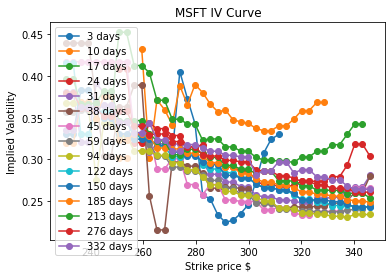

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm
import datetime
from datetime import timezone

def get_fridays(years = 1):
    fridays = []
    date = datetime.date.today() + datetime.timedelta(days=(4-datetime.date.today().weekday()) % 7) # next Friday
    one_year_later = datetime.date.today() + datetime.timedelta(days=365*years)

    while date <= one_year_later:
        fridays.append(date.strftime("%Y-%m-%d"))
        date += datetime.timedelta(days=7)
    return fridays

date_format = "%Y-%m-%d"

# 获取标的资产历史价格数据
sym = 'MSFT'   # 标的资产代码
tick = yf.Ticker(sym)
hist_prices = tick.history(period='max')['Close']

# 计算每个到期期限的隐含波动率
prices = np.array(hist_prices)
S = prices[-1]
rf = 0.01   # 无风险利率
#date_list = ['2023-04-21', '2023-04-28', '2023-05-05', '2023-05-12', '2023-05-19', '2023-05-26', '2023-06-02', '2023-06-16', '2023-07-21', '2023-08-18', '2023-09-15', '2023-10-20', '2023-11-17', '2023-12-15', '2024-01-19', '2024-03-15', '2024-06-21', '2024-09-20', '2024-12-20', '2025-01-17', '2025-06-20', '2025-12-19']
date_list = get_fridays(years =1)

t = np.array(date_list)   # 到期期限（以年为单位
#delta_t = [(lambda d: (datetime.datetime.strptime(d, date_format).date()- datetime.date.today()).days/365)(d)\
#            for d in date_list]

steps = 100
K = np.array([S*i/steps for i in range(int(0.8*steps), int(1.2*steps)+1)])   # 行权价格
print(K)
cp = 'call'   # 看涨期权
iv = []
delta_t = []
utc_now = datetime.datetime.now(timezone.utc)
for j in range(len(t)):
    try:
        call_options = tick.option_chain(t[j]).calls
        print((utc_now - call_options['lastTradeDate'][1]) / np.timedelta64(1, 'D'))
        opt = call_options.loc[(utc_now - call_options['lastTradeDate']) / np.timedelta64(1, 'D') < 7] 
    except Exception as e:
        print(e)
        continue
    delta_t.append((datetime.datetime.strptime(t[j], date_format).date()- datetime.date.today()).days/365)
    for i in range(len(K)):
        opt_strike = opt.strike.values
        opt_price = opt.lastPrice.values
        idx = np.argmin(np.abs(opt_strike - K[i]))
        if opt_strike[idx] < K[i]:
            idx = idx + 1
        sigma = 0.2   # 初始波动率猜测值
        for k in range(100):
            d1 = (np.log(S/opt_strike[idx]) + (rf + 0.5*sigma**2)*delta_t[-1]) / (sigma*np.sqrt(delta_t[-1]))
            d2 = d1 - sigma*np.sqrt(delta_t[-1])
            opt_price_bs = S*norm.cdf(d1) - np.exp(-rf*delta_t[-1])*opt_strike[idx]*norm.cdf(d2)
            vega = S*np.sqrt(delta_t[-1])*norm.pdf(d1)
            sigma = sigma - (opt_price_bs - opt_price[idx]) / vega
        iv.append(sigma)

# 绘制波动率微笑曲
for i in range(len(delta_t)):
    plt.plot(K, iv[i*len(K):(i+1)*len(K)], 'o-', label=f'{round(delta_t[i]*365)} days')

plt.xlabel('Strike price $')
plt.ylabel('Implied Valotility')
plt.title(f'{sym} IV Curve')
plt.legend()
plt.show()


In [4]:

import yfinance as yf
import datetime
import pandas as pd
from datetime import timezone
date_format = "%Y-%m-%d"

a = yf.Ticker('MSFT').option_chain().calls
a.drop(['contractSymbol'])

#a
#Cannot subtract tz-naive and tz-aware datetime-like objects. a['lastTradeDate'])
#datetime.datetime.today() - a['lastTradeDate'][1]


KeyError: "['contractSymbol'] not found in axis"

In [207]:
import numpy as np

# 定义一个函数来找到float list中的极小值
def find_min(values):
    # 排除极值（Q1-1.5*IQR和Q3+1.5*IQR之外的值）
    q1, q3 = np.percentile(values, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    values = [v for v in values if v >= lower_bound and v <= upper_bound]

    # 找到极小值
    min_value = min(values)
    return min_value

# 示例数据
data = np.array([0.31904166206843815, 0.15103182667147508, 0.39316516540156016, 0.36313241464230894, 0.3350703529035144, 0.2526169093568501, 0.24921772035752002, 0.23085799828246734, 0.22242922384537434, 0.2253097748715074, 0.23362386570411717, 0.24440891249519278, 0.27208852808812667, 0.3062290892818637, 0.32328881067452403, 0.32904498020296885])

z_score_threshold = 2
mean = np.mean(data)
std = np.std(data)
z_scores = np.abs((data - mean) / std)
data = data[z_scores < z_score_threshold]

find_min(data)

0.22242922384537434

拟合参数： [ 1.34980007e-04 -7.81870348e-02  1.15756300e+01]


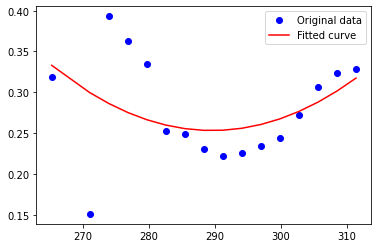

In [200]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 定义凹曲线的函数
def concave_curve(x, a, b, c):
    return a * x**2 + b * x + c

# 生成含有噪声的凹曲线的数据
x = np.array([265.3003955078125, 271.06779541015624, 273.9514953613281, 276.8351953125, 279.71889526367187, 282.60259521484375, 285.4862951660156, 288.3699951171875, 291.2536950683594, 294.13739501953125, 297.02109497070313, 299.904794921875, 302.7884948730469, 305.67219482421876, 308.55589477539064, 311.4395947265625])
y = np.array([0.31904166206843815, 0.15103182667147508, 0.39316516540156016, 0.36313241464230894, 0.3350703529035144, 0.2526169093568501, 0.24921772035752002, 0.23085799828246734, 0.22242922384537434, 0.2253097748715074, 0.23362386570411717, 0.24440891249519278, 0.27208852808812667, 0.3062290892818637, 0.32328881067452403, 0.32904498020296885])

# 使用curve_fit函数拟合凹曲线
popt, pcov = curve_fit(concave_curve, x, y)

# 输出拟合参数
print("拟合参数：", popt)

# 绘制原始数据和拟合曲线
plt.plot(x, y, 'bo', label='Original data')
plt.plot(x, concave_curve(x, *popt), 'r-', label='Fitted curve')
plt.legend()
plt.show()


165.02000427246094


<AxesSubplot:xlabel='Return Rate std', ylabel='Return Rate'>

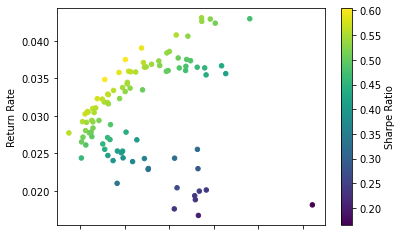

In [196]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm
import datetime
from datetime import timezone

def get_fridays(weeks = 2):
    fridays = []
    date = datetime.date.today() + datetime.timedelta(days=(4-datetime.date.today().weekday()) % 7) # next Friday
    if date == datetime.date.today():
        date += datetime.timedelta(days = 7)
    one_year_later = datetime.date.today() + datetime.timedelta(days=7*weeks)

    while date <= one_year_later:
        fridays.append(date.strftime("%Y-%m-%d"))
        date += datetime.timedelta(days=7)
    return fridays

tick = yf.Ticker('AAPL')
# include no option portfolio, so at least 1
num_options_in_portfolio = 1
allocation_iteration = 100
prediction_iteration = 1000
option_choice = 1
hist_prices = tick.history(period='max')['Close']
current_price = tick.info['currentPrice']
print(hist_prices[-1])

hist_prices.pct_change().mean()
hist_prices.pct_change().std()

date_list = get_fridays()
t = np.array(date_list)   # 到期期限（以年为单位
days  = (datetime.datetime.strptime(t[option_choice], date_format).date()- datetime.date.today()).days

opt = tick.option_chain(t[option_choice]).puts.nlargest(num_options_in_portfolio, 'volume')
total_earn = {}
weights = []
# Testing no option first
put_weight = [0.0] * num_options_in_portfolio

for w in range(allocation_iteration):
    end_price = [current_price]*prediction_iteration
    total_earn[str(put_weight)] = {'Return Rate': 0, 'Return Rate std': 0}
    total_return = []
    total_return_no_oprtion = []
    for i in range(prediction_iteration):
        total_change = np.prod(np.random.normal(hist_prices.pct_change().mean(), hist_prices.pct_change().std(), size = days) +1)
        end_price[i] *= total_change
        cost = 0
        earn = 0
        for j in range(num_options_in_portfolio):
            cost += put_weight[j]*list(opt['lastPrice'])[j]
            earn += put_weight[j]* max(list(opt['strike'])[j] - end_price[i], 0)
    #total_earn['Total Earn'].add(end_price[i] - current_price + earn - cost)
    #total_earn['Total Earn without option'].add(end_price[i] - current_price)
        total_return.append((end_price[i] - current_price + earn - cost)/current_price)

    total_earn[str(put_weight)]['Return Rate'] = np.mean(total_return)
    total_earn[str(put_weight)]['Return Rate std'] = np.std(total_return)
    # set up next random allocation
    put_weight = np.random.random(num_options_in_portfolio)*2+0.5
    #put_weight /= np.sum(put_weight)/(np.random.random(1) if w%2 else 1/np.random.random(1))

df = pd.DataFrame(total_earn).T
df['Sharpe Ratio'] = (df['Return Rate'] - yf.Ticker('^TNX').history(period='1d')['Close'][-1]/100/365*days) / df['Return Rate std']
df.plot.scatter(x = 'Return Rate std', y ='Return Rate', c='Sharpe Ratio', colormap='viridis')




In [194]:
df

,Return Rate,Return Rate std,Sharpe Ratio
[0.0],0.016145,0.102956,0.144467
[0.27374497],0.017711,0.088695,0.185352
[0.84871411],0.023389,0.062364,0.354656
[0.05690441],0.012411,0.098314,0.113310
[1.64350727],0.031084,0.052943,0.563111
...,...,...,...
[1.06633616],0.027189,0.056938,0.455192
[1.60722755],0.031525,0.053235,0.568306
[0.91178018],0.026745,0.063917,0.398540
[0.31670071],0.017701,0.086692,0.189511


<AxesSubplot:xlabel='Return Rate std', ylabel='Return Rate'>

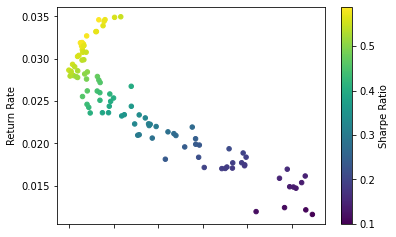

In [195]:
df.plot.scatter(x = 'Return Rate std', y ='Return Rate', c='Sharpe Ratio', colormap='viridis')